In [2]:
import pymc3 as pm
import numpy as np
import theano
from collections import defaultdict
import seaborn as sns

sns.set_context('poster')
sns.set_style('white')
%matplotlib inline

In [3]:
# Set up a pilot experiment with n=2
loc = 10
size = 2

vals = np.random.normal(loc=loc, scale=1, size=size)
print(vals)
obs = theano.shared(vals)

with pm.Model() as model:
    mu = pm.Uniform('mu', lower=-10000, upper=10000)
    sd = pm.Exponential('sd', lam=10)
    likelihood = pm.Normal('like', mu=mu, sd=sd, observed=obs)
    params = pm.variational.advi(n=100000)
    trace = pm.variational.sample_vp(params, draws=5000)

[ 9.71949763  9.58405788]
Applied interval-transform to mu and added transformed mu_interval_ to model.
Applied log-transform to sd and added transformed sd_log_ to model.
Iteration 0 [0%]: ELBO = -66081941567.09
Iteration 10000 [10%]: Average ELBO = -2479633224.53
Iteration 20000 [20%]: Average ELBO = -694210.69
Iteration 30000 [30%]: Average ELBO = -301.13
Iteration 40000 [40%]: Average ELBO = -41.25
Iteration 50000 [50%]: Average ELBO = -21.54
Iteration 60000 [60%]: Average ELBO = -18.83
Iteration 70000 [70%]: Average ELBO = -18.7
Iteration 80000 [80%]: Average ELBO = -18.79
Iteration 90000 [90%]: Average ELBO = -18.8
Finished [100%]: Average ELBO = -18.67


/Users/ericmjl/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


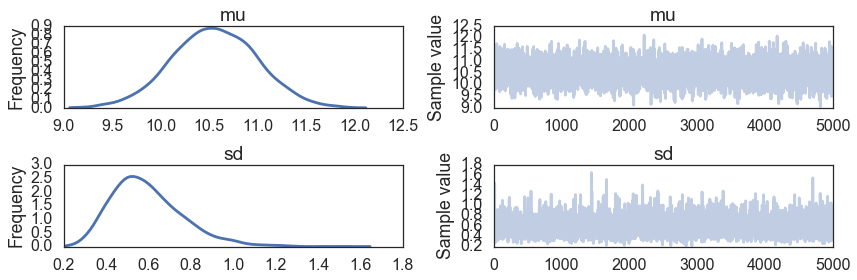

In [4]:
import matplotlib.pyplot as plt 

with model:
    pm.traceplot(trace)
    plt.legend()

In [5]:
def hpd_range(trace, key, perc=95):
    lowperc = (100 - perc) / 2
    uppperc = 100 - (lowperc)
    lower, upper = np.percentile(trace[key], [lowperc, uppperc])
    rng = upper - lower
    return rng

def ratio_uncertainty_to_value(trace, key):
    # lower, upper = np.percentile(trace[key], [2.5, 97.5])
    density = hpd_range(trace, key)
    return density / np.mean(trace[key])



hpd_range(trace, 'mu'), ratio_uncertainty_to_value(trace, 'mu')

(1.7390628033999747, 0.16469439520980239)